In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input,LSTM,Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [2]:
#load data
(x_train,y_train1),(x_test,y_test1)=cifar10.load_data()

#normalization
x_train=x_train.reshape((50000,1024,3)).astype('float32')/255
x_test=x_test.reshape((10000,1024,3)).astype('float32')/255

y_train=to_categorical(y_train1)
y_test=to_categorical(y_test1)

170498071/170498071 [==============================] - 10s 0us/step


In [3]:
inputs=Input(shape=(1024,3))#input layer
rnn_layer1=LSTM(256)(inputs)#hidden layer1
rnn_layer2=Dense(128)(rnn_layer1)#hidden layer2
outputs=Dense(10,activation='softmax')(rnn_layer2)#output layer
model=Model(inputs,outputs)

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
1407/1407 [==============================] - 76s 51ms/step - loss: 2.1706 - accuracy: 0.1954 - val_loss: 2.1142 - val_accuracy: 0.2350
Epoch 2/5
1407/1407 [==============================] - 72s 51ms/step - loss: 2.1464 - accuracy: 0.2112 - val_loss: 2.1200 - val_accuracy: 0.2284
Epoch 3/5
1407/1407 [==============================] - 70s 50ms/step - loss: 2.1750 - accuracy: 0.1975 - val_loss: 2.2375 - val_accuracy: 0.1630
Epoch 4/5
1407/1407 [==============================] - 70s 49ms/step - loss: 2.2022 - accuracy: 0.1768 - val_loss: 2.2059 - val_accuracy: 0.1830
Epoch 5/5
1407/1407 [==============================] - 70s 50ms/step - loss: 2.1628 - accuracy: 0.1976 - val_loss: 2.1088 - val_accuracy: 0.2348


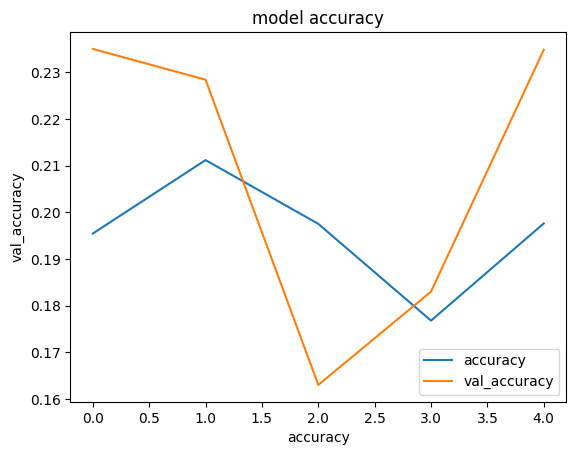

In [6]:
#model accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.legend(['accuracy','val_accuracy'],loc='lower right')
plt.show()

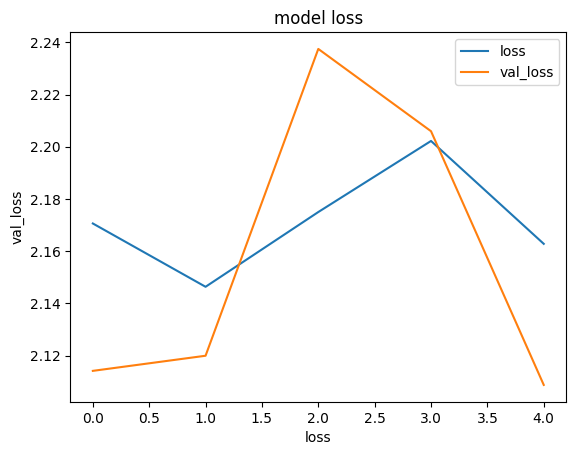

In [7]:
#model loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

In [8]:
y_pred=model.predict(x_test)
y_pred

313/313 [==============================] - 6s 20ms/step


array([[0.2994713 , 0.06461289, 0.03834246, ..., 0.00334065, 0.4901906 ,
        0.01576782],
       [0.07702526, 0.16768272, 0.07804494, ..., 0.06935648, 0.11651444,
        0.21331047],
       [0.09818845, 0.13392687, 0.08000628, ..., 0.03229349, 0.25496405,
        0.09540932],
       ...,
       [0.08223461, 0.12166385, 0.08787069, ..., 0.05330052, 0.12216766,
        0.11121085],
       [0.03026496, 0.02913584, 0.17159802, ..., 0.16846086, 0.01724488,
        0.03853835],
       [0.03709861, 0.02906498, 0.15231831, ..., 0.13901   , 0.01134106,
        0.03419162]], dtype=float32)

In [9]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([8, 9, 8, ..., 3, 4, 6])

In [10]:
from sklearn.metrics import accuracy_score
#accuracy_score
accuracy_score(y_test1,y_pred)

0.2311